<a href="https://colab.research.google.com/github/kmayutrisna/SA_IMDB/blob/main/Amazon_keras_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary library
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import re

In [2]:
#Get the dataset from gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Display top of data
train_data =pd.read_csv("drive/My Drive/data/train_amazon.csv")
test_data = pd.read_csv("drive/My Drive/data/test_amazon.csv")

In [4]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [5]:
# Text preprocessing
from nltk.corpus import stopwords
def preprocess_text(text):

    # Text cleaning
    text = re.sub('[^a-zA-Z]', ' ', text)

    #Single character removal
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)

    #Remove multiple spaces
    text = re.sub(r'\s+', ' ', text)

    # Lowercasing
    text = text.lower()

    # Lowercasing
    text = text.split()

    # Stopword removal
    stop_words = set(stopwords.words('english'))
    text = [word for word in text if not word in stop_words]

    # Join the tokens back to a single string
    text = ' '.join(text)
    return text

In [6]:
# Preprocess the text column
import re
train_data['text'] = train_data['text'].apply(preprocess_text)
test_data['text'] = test_data['text'].apply(preprocess_text)

In [7]:
X_train = train_data['text']
y_train = train_data['label']

X_test = test_data['text']
y_test = test_data['label']

In [8]:
# Tokenization and Padding
max_words = 10000
max_seq_length = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(X_train_seq, maxlen=max_seq_length)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_seq_length)

In [9]:
# Build CNN Model with Keras Embedding Layer
model = keras.Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_seq_length),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(5),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
# Train the Model
epochs = 5
batch_size = 64

history = model.fit(X_train_padded, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/5
450/450 [==============================] - 52s 112ms/step - loss: 0.3834 - accuracy: 0.8166 - val_loss: 0.3043 - val_accuracy: 0.8704
Epoch 2/5
450/450 [==============================] - 60s 134ms/step - loss: 0.1956 - accuracy: 0.9263 - val_loss: 0.3140 - val_accuracy: 0.8699
Epoch 3/5
450/450 [==============================] - 48s 106ms/step - loss: 0.0659 - accuracy: 0.9787 - val_loss: 0.5473 - val_accuracy: 0.8449
Epoch 4/5
450/450 [==============================] - 49s 108ms/step - loss: 0.0164 - accuracy: 0.9953 - val_loss: 0.6470 - val_accuracy: 0.8553
Epoch 5/5
450/450 [==============================] - 49s 109ms/step - loss: 0.0032 - accuracy: 0.9993 - val_loss: 0.8439 - val_accuracy: 0.8549


In [12]:
# Evaluate the Model
y_pred = model.predict(X_test_padded)
y_pred = (y_pred > 0.5).astype(int)


125/125 [==============================] - 2s 12ms/step


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1 Score: {f1*100:.2f}%")

Accuracy: 85.47%
Precision: 84.14%
Recall: 88.29%
F1 Score: 86.16%


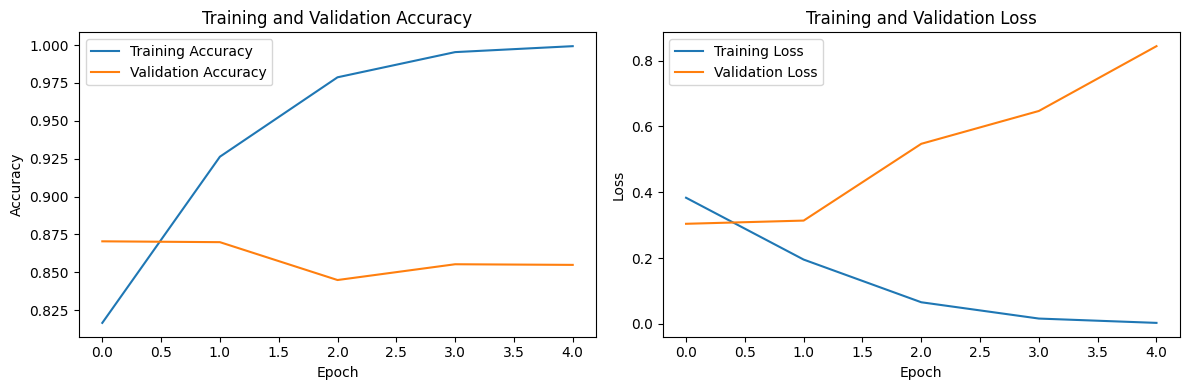

In [15]:
# Plot Training History (Accuracy and Loss)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()
